## In this post, we shall try understanding **Central Limit Theorem (CLT)** with a practical example

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

In [42]:
# Let us use a housing prices dataset
ontario_housing = pd.read_csv('properties.csv',index_col=0)
ontario_housing.head()

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [43]:
# setting the proce column in thousands of $
ontario_housing['Price ($)'] = ontario_housing['Price ($)']/1000 
prices = ontario_housing['Price ($)']

# Find the size, mean and standard_deviation of the population (housing prices)
population_size = len(ontario_housing)
population_mean = ontario_housing['Price ($)'].mean()
population_std = ontario_housing['Price ($)'].std()
population_min = ontario_housing['Price ($)'].min()
population_max = ontario_housing['Price ($)'].max()
print(f'Size of the population: {population_size}')
print(f"population mean: {population_mean}")
print(f"population stdandard deviation: {population_std}")
print(f"population minimum price: {population_min}")
print(f"population maximum price: {population_max}")

Size of the population: 25351
population mean: 564.5437651375793
population stdandard deviation: 847.5961673368403
population minimum price: 0.0
population maximum price: 32500.0


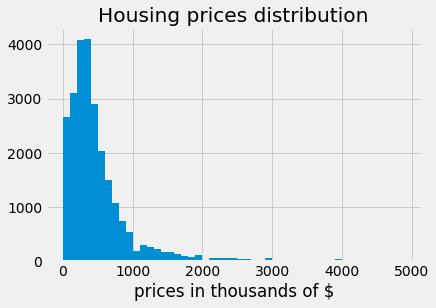

In [44]:
# Understanding the population
axes = prices.hist(bins=np.arange(min(prices), 5000 , 100))
plot.title('Housing prices distribution')
plot.xlabel('prices in thousands of $');

Population seems to be extremely skewed to the right and quite different from a textbook normal distribution.
Suppose we want to learn the mean price of the housing population and obviously we can't collect the data of the entire population as it may turn to be a costlier affair in most of the cases. This is where CLT comes to our rescue.

### The **Central Limit Theorem** states that regardless of the underlying population distribution, the probability distribution of the sum / mean of the large sample drawn from the population tends to be normally distributed


Thus we can estimate the population's mean without knowing the complete population and by only constructing a distribution of means from large number of samples drawn from the underlying population. This seems to approximate the population's mean very well. 

How closely it represents ?
This is where the standard error or the standard deviation of the sampling distribution comes into the picture. More the sample size, lower the standard error. However the improvements to the estimation is not linear but it is given by the below formula

`**SD of the means of the samples = population SD / sqrt(n)**` 

The below code with increasing the sample size to create a distribution of sample means seems to approximate the population mean pretty closely and with increase in sample size for ech experiment, leading to reduced sampling error (SD of distribution of the sample means)

In [0]:
def compute_sampling_distribution(table, size=100, iteration=10000):
  averages = []
  for i in np.arange(iteration):
    sample_prices = table.sample(size)
    sample_mean = np.average(sample_prices)
    averages.append(sample_mean)
  axes = pd.DataFrame(averages, columns=['mean_prices'],index=np.arange(iteration)).hist()
  plot.title(f'Mean housing prices (sample size = {size})')
  plot.xlabel('prices in thousands')
  sample_dist_mean = np.average(averages)
  sample_dist_std_dev = np.std(averages)
  print()
  print(f'sample size = {size}')
  print(f'Sampling distribution mean = {sample_dist_mean}')
  print(f'Sampling distribution stddev = {sample_dist_std_dev}')
  print(f'population mean = {population_mean}')
  print(f'population stddev = {population_std}')
  print(f'population stddev / sqrt(size) = {population_std/np.sqrt(size)}')
  std_error.append([size, sample_dist_std_dev])



sample size = 2
Sampling distribution mean = 555.8349295
Sampling distribution stddev = 549.2789350100446
population mean = 564.5437651375793
population stddev = 847.5961673368403
population stddev / sqrt(size) = 599.3409976316074

sample size = 4
Sampling distribution mean = 567.975572575
Sampling distribution stddev = 426.98923436462695
population mean = 564.5437651375793
population stddev = 847.5961673368403
population stddev / sqrt(size) = 423.79808366842013

sample size = 8
Sampling distribution mean = 571.8044108624999
Sampling distribution stddev = 307.7342602367094
population mean = 564.5437651375793
population stddev = 847.5961673368403
population stddev / sqrt(size) = 299.6704988158037

sample size = 16
Sampling distribution mean = 563.3447951437502
Sampling distribution stddev = 211.2867299348587
population mean = 564.5437651375793
population stddev = 847.5961673368403
population stddev / sqrt(size) = 211.89904183421007

sample size = 32
Sampling distribution mean = 565.063

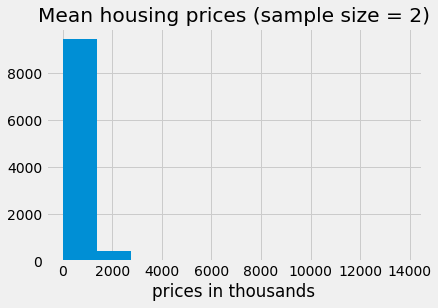

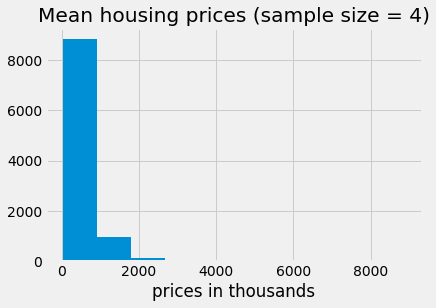

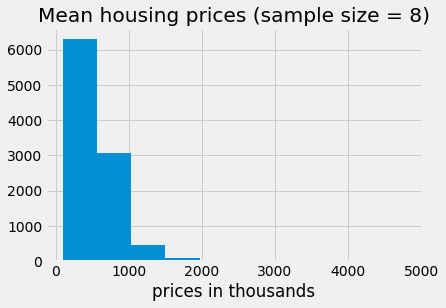

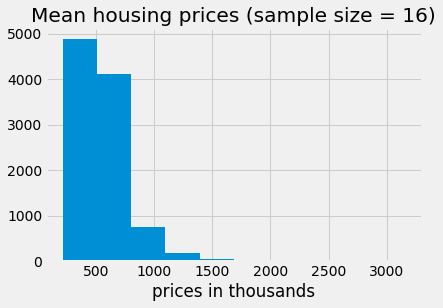

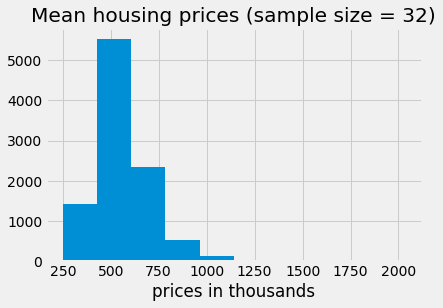

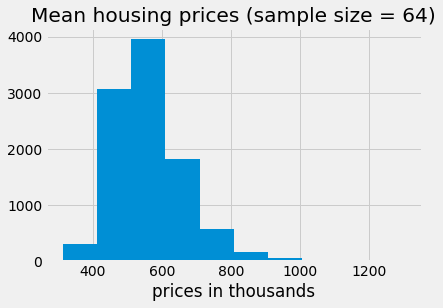

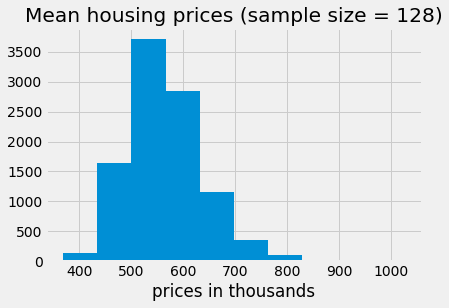

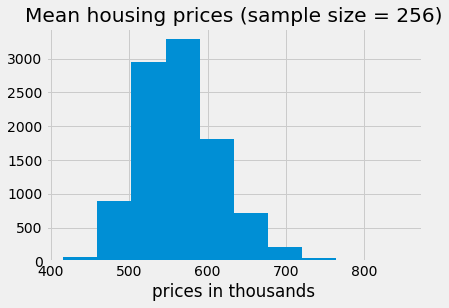

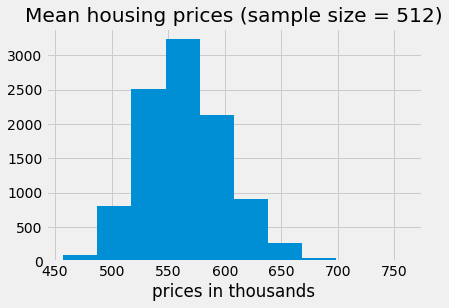

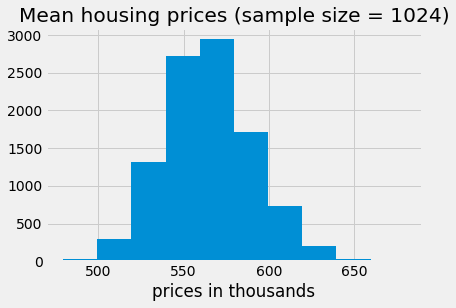

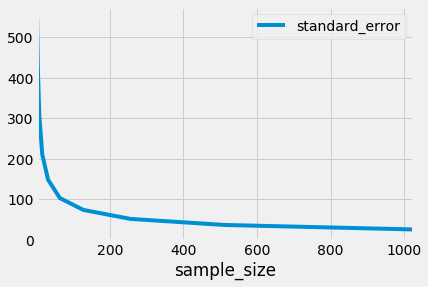

In [40]:
# Studying the relationship between the standard error and the sampling size
std_error = []

compute_sampling_distribution(prices,2,10000)
compute_sampling_distribution(prices,4,10000)
compute_sampling_distribution(prices,8,10000)
compute_sampling_distribution(prices,16,10000)
compute_sampling_distribution(prices,32,10000)
compute_sampling_distribution(prices,64,10000)
compute_sampling_distribution(prices,128,10000)
compute_sampling_distribution(prices,256,10000)
compute_sampling_distribution(prices,512,10000)
compute_sampling_distribution(prices,1024,10000)
error_df = pd.DataFrame(std_error, columns=['sample_size', 'standard_error'])
error_df.plot('sample_size', 'standard_error')